In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

parent_dir = "/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024"
sys.path.append(parent_dir)
parent_dir="/Midgard/home/farzantn/mambaforge/envs/MolTran_CUDA11_cuda/lib/python3.8"
sys.path.append(parent_dir)
base_dir = '/local_storage/datasets/farzaneh/alignment_olfaction_datasets/'

In [2]:
device_name='cuda'
from argparse import Namespace
import yaml


# Determine the path to the 'hparams.yaml' file relative to the script's location
script_dir = os.getcwd()
yaml_path = os.path.join(script_dir, 'custom_utils/hparams.yaml')

with open('../custom_utils/hparams.yaml', 'r') as f:
    config = Namespace(**yaml.safe_load(f))
    
from custom_utils.tokenizer.tokenizer import MolTranBertTokenizer
from custom_utils.train_pubchem_light import LightningModule

from utils.util_alignment import *
from utils.prepare_datasets import *
from utils.visualization_helper import *
from constants import gs_lf_tasks


Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


Mol


In [3]:
seed = 2024
set_seeds(seed)

In [4]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 25
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',**{'family':'serif','serif':['Times']})

## Loading MolFormer Model

In [5]:
tokenizer = MolTranBertTokenizer('../custom_utils/tokenizer/bert_vocab.txt')
ckpt = '../MoLformer_Pretrained/checkpoints/N-Step-Checkpoint_3_30000.ckpt'
lm = LightningModule(config, tokenizer.vocab).load_from_checkpoint(ckpt, config=config, vocab=tokenizer.vocab)

/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


Global seed set to 12345


Using Rotation Embedding
Using Rotation Embedding
/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


Global seed set to 12345


Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


# Loading Human Embeddings

## Ravia 2020 Similarity

In [6]:
df_ravia,df_ravia_similarity_mean, df_ravia_similarity_mean_pivoted=prepare_ravia_or_snitz(dataset='curated_datasets/tasks/curated_ravia2020_behavior_similairity.csv',base_path=base_dir)

## Snitz 2013

In [7]:
df_snitz, df_snitz_mean,df_snitz_mean_pivoted=prepare_ravia_or_snitz(dataset='curated_datasets/tasks/curated_snitz2013.csv',base_path=base_dir)

# Extracting embedding from MoLFormer Frozen

In [8]:
indices_train,indices_valid,indices_test = extract_set_idxs(base_dir, indices_path='curated_datasets/embeddings/pom/gslf-splits-idx.csv')

##  GS-LF 

In [9]:
input_file_molformer = 'curated_datasets/embeddings/molformer/gslf_molformer_embeddings_13_Apr17.csv'

gs_lf, gs_lf_np,gs_lf_y,gs_lf_embeddings_train,gs_lf_y_train,gs_lf_embeddings_valid,gs_lf_y_valid,gs_lf_embeddings_test,gs_lf_y_test = extract_set_from_indices(base_dir,input_file_molformer ,"embeddings","y", indices_train, indices_valid, indices_test)

In [10]:
embedding_train_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_train,gs_lf_y_train)
embedding_test_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_test,gs_lf_y_test)
embedding_valid_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_valid,gs_lf_y_valid)

dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_np,gs_lf_y)

## Ravia2020

In [11]:
modeldeepchem_gslf = None

In [12]:
input_file_molformer='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/ravia_molformer_embeddings_13_Apr17.csv'
df_ravia_similarity_mols_reps_sum,df_ravia_similarity_mols_embeddings_original_reps_sum\
,df_ravia_similarity_mols_embeddings_reps_sum,df_ravia_similarity_mols_embeddings_zscored_reps_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer, df_ravia_similarity_mean,mixing_type='sum')

In [13]:
df_ravia_similarity_mols_reps_average,df_ravia_similarity_mols_embeddings_original_reps_average\
,df_ravia_similarity_mols_embeddings_reps_average,df_ravia_similarity_mols_embeddings_zscored_reps_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer, df_ravia_similarity_mean,mixing_type='average')

[126, 520296, 7122, 6050, 5273467, 5364231]
[    126     126     176     176     180     180     240     240     261
     261     263     263     264     264     325     325     326     326
     342     527     527     660     660     957     957     999     999
    1031    1031    1032    1032    1068    1068    1140    1140    1213
    1213    2214    2214    2758    2758    3314    3314    3776    3776
    4133    4133    6050    6050    6054    6054    6106    6106    6184
    6276    6276    6305    6305    6501    6501    6544    6544    6549
    6560    6560    6561    6561    6569    6569    6584    6584    6590
    6590    6654    6654    6997    6997    6998    6998    7059    7059
    7122    7122    7128    7128    7150    7150    7194    7194    7284
    7284    7363    7363    7406    7406    7410    7410    7519    7519
    7593    7593    7600    7600    7601    7601    7655    7655    7657
    7657    7685    7685    7710    7710    7714    7714    7731    7731
    774

In [14]:
df_ravia_similarity_mols_smiles,df_ravia_similarity_mols_embeddings_original_smiles\
,df_ravia_similarity_mols_embeddings_smiles,df_ravia_similarity_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_ravia_similarity_mean, lm, tokenizer)

#### across layers

In [15]:
df_ravia_similarity_mols_reps_sum_layers = []
df_ravia_similarity_mols_embeddings_original_reps_sum_layers = []
df_ravia_similarity_mols_embeddings_reps_sum_layers = []
df_ravia_similarity_mols_embeddings_zscored_reps_sum_layers = []

for i in range(12):
    input_file_molformer = f'/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/ravia_molformer_embeddings_{i}_Apr17.csv'
    df_ravia_similarity_mols_reps_sum_temp,df_ravia_similarity_mols_embeddings_original_reps_sum_temp\
    ,df_ravia_similarity_mols_embeddings_reps_sum_temp,df_ravia_similarity_mols_embeddings_zscored_reps_sum_temp\
    =prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer, df_ravia_similarity_mean,mixing_type='sum')


    df_ravia_similarity_mols_reps_sum_layers.append(df_ravia_similarity_mols_reps_sum_temp)
    df_ravia_similarity_mols_embeddings_original_reps_sum_layers.append(df_ravia_similarity_mols_embeddings_original_reps_sum_temp)
    df_ravia_similarity_mols_embeddings_reps_sum_layers.append(df_ravia_similarity_mols_embeddings_reps_sum_temp)
    df_ravia_similarity_mols_embeddings_zscored_reps_sum_layers.append(df_ravia_similarity_mols_embeddings_zscored_reps_sum_temp)



In [16]:
df_ravia_similarity_mols_reps_average_layers = []
df_ravia_similarity_mols_embeddings_original_reps_average_layers = []
df_ravia_similarity_mols_embeddings_reps_average_layers = []
df_ravia_similarity_mols_embeddings_zscored_reps_average_layers = []
for i in range(12):
    input_file_molformer = f'/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/ravia_molformer_embeddings_{i}_Apr17.csv'
    df_ravia_similarity_mols_reps_average_temp,df_ravia_similarity_mols_embeddings_original_reps_average_temp\
    ,df_ravia_similarity_mols_embeddings_reps_average_temp,df_ravia_similarity_mols_embeddings_zscored_reps_average_temp\
    =prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer, df_ravia_similarity_mean,mixing_type='average')

    df_ravia_similarity_mols_reps_average_layers.append(df_ravia_similarity_mols_reps_average_temp)
    df_ravia_similarity_mols_embeddings_original_reps_average_layers.append(df_ravia_similarity_mols_embeddings_original_reps_average_temp)
    df_ravia_similarity_mols_embeddings_reps_average_layers.append(df_ravia_similarity_mols_embeddings_reps_average_temp)
    df_ravia_similarity_mols_embeddings_zscored_reps_average_layers.append(df_ravia_similarity_mols_embeddings_zscored_reps_average_temp)


[126, 520296, 7122, 6050, 5273467, 5364231]
[    126     126     176     176     180     180     240     240     261
     261     263     263     264     264     325     325     326     326
     342     527     527     660     660     957     957     999     999
    1031    1031    1032    1032    1068    1068    1140    1140    1213
    1213    2214    2214    2758    2758    3314    3314    3776    3776
    4133    4133    6050    6050    6054    6054    6106    6106    6184
    6276    6276    6305    6305    6501    6501    6544    6544    6549
    6560    6560    6561    6561    6569    6569    6584    6584    6590
    6590    6654    6654    6997    6997    6998    6998    7059    7059
    7122    7122    7128    7128    7150    7150    7194    7194    7284
    7284    7363    7363    7406    7406    7410    7410    7519    7519
    7593    7593    7600    7600    7601    7601    7655    7655    7657
    7657    7685    7685    7710    7710    7714    7714    7731    7731
    774

In [17]:
df_ravia_similarity_mols_smiles_layers = []
df_ravia_similarity_mols_embeddings_original_smiles_layers = []
df_ravia_similarity_mols_embeddings_smiles_layers = []
df_ravia_similarity_mols_embeddings_zscored_smiles_layers = []


for i in range(12):
    input_file_molformer = f'/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/ravia_molformer_embeddings_{i}_Apr17.csv'

    df_ravia_similarity_mols_smiles_temp,df_ravia_similarity_mols_embeddings_original_smiles_temp\
    ,df_ravia_similarity_mols_embeddings_smiles_temp,df_ravia_similarity_mols_embeddings_zscored_smiles_temp\
    =prepare_ravia_similarity_mols_mix_on_smiles(df_ravia_similarity_mean, lm, tokenizer)

    df_ravia_similarity_mols_smiles_layers.append(df_ravia_similarity_mols_smiles_temp)
    df_ravia_similarity_mols_embeddings_original_smiles_layers.append(df_ravia_similarity_mols_embeddings_original_smiles_temp)
    df_ravia_similarity_mols_embeddings_smiles_layers.append(df_ravia_similarity_mols_embeddings_smiles_temp)
    df_ravia_similarity_mols_embeddings_zscored_smiles_layers.append(df_ravia_similarity_mols_embeddings_zscored_smiles_temp)


## Snitz 2013 

In [18]:
input_file_molformr='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/snitz_molformer_embeddings_13_Apr17.csv'
df_snitz_mols_reps_sum,df_snitz_mols_embeddings_original_reps_sum\
,df_snitz_mols_embeddings_reps_sum,df_snitz_mols_embeddings_zscored_reps_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformr, df_snitz_mean,sep=',',mixing_type='sum')

In [19]:
df_snitz_mols_reps_average,df_snitz_mols_embeddings_original_reps_average\
,df_snitz_mols_embeddings_reps_average,df_snitz_mols_embeddings_zscored_reps_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformr, df_snitz_mean,sep=',',mixing_type='average')

[10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10722]
[     58     107     176 ... 5371000 6259976 6260000]
[10821]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 7519, 323, 7583, 7762, 26331, 8892, 7888, 443158, 16666, 8635, 91497, 8918, 957, 18827, 8118, 8030, 6989, 5634, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 93009, 11002, 6982, 323, 8797, 7966, 8148, 7632, 31252, 19310, 7762, 3314, 460, 6184, 8892, 8103, 12178, 5281168, 798, 443158, 20859, 7059, 91497, 999, 10821, 6544, 7770, 7714, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[11002]
[     58     107     176 ... 5371000 6259976 6260000]
[11002, 307, 7685, 12178, 4133, 7991, 6054, 7770, 7714]
[     58     107     176 ... 5371000 6259976 6260000]
[1140]
[     58     107     176 ... 5371000 6259976 6260000]
[12178]
[     58     107     176 ... 5371000 6259976 6260000]
[14286, 31276, 7600, 7519, 11002, 6982, 307, 323, 5283349, 7762, 26331, 3314, 7363, 8892, 81

In [20]:
df_snitz_mols_smiles,df_snitz_mols_embeddings_original_smiles\
,df_snitz_mols_embeddings_smiles,df_snitz_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_snitz_mean, lm, tokenizer)

#### across layers

In [21]:
df_snitz_mols_reps_sum_layers = []
df_snitz_mols_embeddings_original_reps_sum_layers = []
df_snitz_mols_embeddings_reps_sum_layers = []
df_snitz_mols_embeddings_zscored_reps_sum_layers = []

for i in range(12):
    input_file_molformer = f'/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/snitz_molformer_embeddings_{i}_Apr17.csv'
    df_snitz_mols_reps_sum_temp,df_snitz_mols_embeddings_original_reps_sum_temp\
    ,df_snitz_mols_embeddings_reps_sum_temp,df_snitz_mols_embeddings_zscored_reps_sum_temp\
    =prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer, df_snitz_mean,sep=',',mixing_type='sum')

    df_snitz_mols_reps_sum_layers.append(df_snitz_mols_reps_sum_temp)
    df_snitz_mols_embeddings_original_reps_sum_layers.append(df_snitz_mols_embeddings_original_reps_sum_temp)
    df_snitz_mols_embeddings_reps_sum_layers.append(df_snitz_mols_embeddings_reps_sum_temp)
    df_snitz_mols_embeddings_zscored_reps_sum_layers.append(df_snitz_mols_embeddings_zscored_reps_sum_temp)

In [22]:
df_snitz_mols_reps_average_layers = []
df_snitz_mols_embeddings_original_reps_average_layers = []
df_snitz_mols_embeddings_reps_average_layers = []
df_snitz_mols_embeddings_zscored_reps_average_layers = []

for i in range(12):
    input_file_molformer = f'/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/snitz_molformer_embeddings_{i}_Apr17.csv'
    df_snitz_mols_reps_average_temp,df_snitz_mols_embeddings_original_reps_average_temp\
    ,df_snitz_mols_embeddings_reps_average_temp,df_snitz_mols_embeddings_zscored_reps_average_temp\
    =prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer, df_snitz_mean,sep=',',mixing_type='average')

    df_snitz_mols_reps_average_layers.append(df_snitz_mols_reps_average_temp)
    df_snitz_mols_embeddings_original_reps_average_layers.append(df_snitz_mols_embeddings_original_reps_average_temp)
    df_snitz_mols_embeddings_reps_average_layers.append(df_snitz_mols_embeddings_reps_average_temp)
    df_snitz_mols_embeddings_zscored_reps_average_layers.append(df_snitz_mols_embeddings_zscored_reps_average_temp)

[10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10722]
[     58     107     176 ... 5371000 6259976 6260000]
[10821]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 7519, 323, 7583, 7762, 26331, 8892, 7888, 443158, 16666, 8635, 91497, 8918, 957, 18827, 8118, 8030, 6989, 5634, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 93009, 11002, 6982, 323, 8797, 7966, 8148, 7632, 31252, 19310, 7762, 3314, 460, 6184, 8892, 8103, 12178, 5281168, 798, 443158, 20859, 7059, 91497, 999, 10821, 6544, 7770, 7714, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[11002]
[     58     107     176 ... 5371000 6259976 6260000]
[11002, 307, 7685, 12178, 4133, 7991, 6054, 7770, 7714]
[     58     107     176 ... 5371000 6259976 6260000]
[1140]
[     58     107     176 ... 5371000 6259976 6260000]
[12178]
[     58     107     176 ... 5371000 6259976 6260000]
[14286, 31276, 7600, 7519, 11002, 6982, 307, 323, 5283349, 7762, 26331, 3314, 7363, 8892, 81

In [23]:
df_snitz_mols_smiles_layers = []
df_snitz_mols_embeddings_original_smiles_layers = []
df_snitz_mols_embeddings_smiles_layers = []
df_snitz_mols_embeddings_zscored_smiles_layers = []

for i in range(12):
    input_file_molformer = f'/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/snitz_molformer_embeddings_{i}_Apr17.csv'
    df_snitz_mols_smiles_temp,df_snitz_mols_embeddings_original_smiles_temp\
    ,df_snitz_mols_embeddings_smiles_temp,df_snitz_mols_embeddings_zscored_smiles_temp\
    =prepare_ravia_similarity_mols_mix_on_smiles(df_snitz_mean, lm, tokenizer)

    df_snitz_mols_smiles_layers.append(df_snitz_mols_smiles_temp)
    df_snitz_mols_embeddings_original_smiles_layers.append(df_snitz_mols_embeddings_original_smiles_temp)
    df_snitz_mols_embeddings_smiles_layers.append(df_snitz_mols_embeddings_smiles_temp)
    df_snitz_mols_embeddings_zscored_smiles_layers.append(df_snitz_mols_embeddings_zscored_smiles_temp)

# Extracting embedding from MoLFormer FineTuned

## Ravia

In [24]:
input_file_molformer_finetuned='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformerfinetuned/ravia_molformerfinetuned_embeddings_13_model_1_Apr17.csv'
df_ravia_finetuned_similarity_mols_reps_sum,df_ravia_finetuned_similarity_mols_embeddings_original_reps_sum\
,df_ravia_finetuned_similarity_mols_embeddings_reps_sum,df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer_finetuned, df_ravia_similarity_mean,mixing_type='sum')

In [25]:
df_ravia_finetuned_similarity_mols_reps_average,df_ravia_finetuned_similarity_mols_embeddings_original_reps_average\
,df_ravia_finetuned_similarity_mols_embeddings_reps_average,df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer_finetuned, df_ravia_similarity_mean,mixing_type='average')

[126, 520296, 7122, 6050, 5273467, 5364231]
[    126     126     176     176     180     180     240     240     261
     261     263     263     264     264     325     325     326     326
     342     527     527     660     660     957     957     999     999
    1031    1031    1032    1032    1068    1068    1140    1140    1213
    1213    2214    2214    2758    2758    3314    3314    3776    3776
    4133    4133    6050    6050    6054    6054    6106    6106    6184
    6276    6276    6305    6305    6501    6501    6544    6544    6549
    6560    6560    6561    6561    6569    6569    6584    6584    6590
    6590    6654    6654    6997    6997    6998    6998    7059    7059
    7122    7122    7128    7128    7150    7150    7194    7194    7284
    7284    7363    7363    7406    7406    7410    7410    7519    7519
    7593    7593    7600    7600    7601    7601    7655    7655    7657
    7657    7685    7685    7710    7710    7714    7714    7731    7731
    774

In [26]:
df_ravia_finetuned_similarity_mols_smiles,df_ravia_finetuned_similarity_mols_embeddings_original_smiles\
,df_ravia_finetuned_similarity_mols_embeddings_smiles,df_ravia_finetuned_similarity_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_ravia_similarity_mean, lm, tokenizer)

## Snitz

In [27]:
input_file_finetuned_molformr='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformerfinetuned/snitz_molformerfinetuned_embeddings_13_model_1_Apr17.csv'
df_snitz_finetuned_mols_reps_sum,df_snitz_finetuned_mols_embeddings_original_reps_sum\
,df_snitz_finetuned_mols_embeddings_reps_sum,df_snitz_finetuned_mols_embeddings_zscored_reps_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_finetuned_molformr, df_snitz_mean,sep=',',mixing_type='sum')

In [28]:
df_snitz_finetuned_mols_reps_average,df_snitz_finetuned_mols_embeddings_original_reps_average\
,df_snitz_finetuned_mols_embeddings_reps_average,df_snitz_finetuned_mols_embeddings_zscored_reps_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_finetuned_molformr, df_snitz_mean,sep=',',mixing_type='average')

[10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10722]
[     58     107     176 ... 5371000 6259976 6260000]
[10821]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 7519, 323, 7583, 7762, 26331, 8892, 7888, 443158, 16666, 8635, 91497, 8918, 957, 18827, 8118, 8030, 6989, 5634, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 93009, 11002, 6982, 323, 8797, 7966, 8148, 7632, 31252, 19310, 7762, 3314, 460, 6184, 8892, 8103, 12178, 5281168, 798, 443158, 20859, 7059, 91497, 999, 10821, 6544, 7770, 7714, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[11002]
[     58     107     176 ... 5371000 6259976 6260000]
[11002, 307, 7685, 12178, 4133, 7991, 6054, 7770, 7714]
[     58     107     176 ... 5371000 6259976 6260000]
[1140]
[     58     107     176 ... 5371000 6259976 6260000]
[12178]
[     58     107     176 ... 5371000 6259976 6260000]
[14286, 31276, 7600, 7519, 11002, 6982, 307, 323, 5283349, 7762, 26331, 3314, 7363, 8892, 81

In [29]:
df_snitz_finetuned_mols_smiles,df_snitz_finetuned_mols_embeddings_original_smiles\
,df_snitz_finetuned_mols_embeddings_smiles,df_snitz_finetuned_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_snitz_mean, lm, tokenizer)

# Extracting embedding from OpenPom


## Ravia2020 

In [30]:
input_file_pom='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/pom/ravia_pom_embeddings_Apr17.csv'

df_ravia_similarity_mols_pom_sum,df_ravia_similarity_mols_embeddings_original_pom_sum\
,df_ravia_similarity_mols_embeddings_pom_sum,df_ravia_similarity_mols_embeddings_zscored_pom_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom, df_ravia_similarity_mean, modeldeepchem_gslf,mixing_type='sum')

In [31]:
df_ravia_similarity_mols_pom_average,df_ravia_similarity_mols_embeddings_original_pom_average\
,df_ravia_similarity_mols_embeddings_pom_average,df_ravia_similarity_mols_embeddings_zscored_pom_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom, df_ravia_similarity_mean, modeldeepchem_gslf,mixing_type='average')

[126, 520296, 7122, 6050, 5273467, 5364231]
[    126     126     176     176     180     180     240     240     261
     261     263     263     264     264     325     325     326     326
     342     527     527     660     660     957     957     999     999
    1031    1031    1032    1032    1068    1068    1140    1140    1213
    1213    2214    2214    2758    2758    3314    3314    3776    3776
    4133    4133    6050    6050    6054    6054    6106    6106    6184
    6276    6276    6305    6305    6501    6501    6544    6544    6549
    6560    6560    6561    6561    6569    6569    6584    6584    6590
    6590    6654    6654    6997    6997    6998    6998    7059    7059
    7122    7122    7128    7128    7150    7150    7194    7194    7284
    7284    7363    7363    7406    7406    7410    7410    7519    7519
    7593    7593    7600    7600    7601    7601    7655    7655    7657
    7657    7685    7685    7710    7710    7714    7714    7731    7731
    774

## Snitz 2013

In [32]:
input_file_pom_snitz='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/pom/snitz_pom_embeddings_Apr17.csv'
df_snitz_mols_pom_sum,df_snitz_mols_embeddings_original_pom_sum\
,df_snitz_mols_embeddings_pom_sum,df_snitz_mols_embeddings_zscored_pom_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom_snitz, df_snitz_mean, modeldeepchem_gslf,sep=',',mixing_type='sum')

In [33]:
df_snitz_mols_pom_average,df_snitz_mols_embeddings_original_pom_average\
,df_snitz_mols_embeddings_pom_average,df_snitz_mols_embeddings_zscored_pom_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom_snitz, df_snitz_mean, modeldeepchem_gslf,sep=',',mixing_type='average')

[10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10722]
[     58     107     176 ... 5371000 6259976 6260000]
[10821]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 7519, 323, 7583, 7762, 26331, 8892, 7888, 443158, 16666, 8635, 91497, 8918, 957, 18827, 8118, 8030, 6989, 5634, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 93009, 11002, 6982, 323, 8797, 7966, 8148, 7632, 31252, 19310, 7762, 3314, 460, 6184, 8892, 8103, 12178, 5281168, 798, 443158, 20859, 7059, 91497, 999, 10821, 6544, 7770, 7714, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[11002]
[     58     107     176 ... 5371000 6259976 6260000]
[11002, 307, 7685, 12178, 4133, 7991, 6054, 7770, 7714]
[     58     107     176 ... 5371000 6259976 6260000]
[1140]
[     58     107     176 ... 5371000 6259976 6260000]
[12178]
[     58     107     176 ... 5371000 6259976 6260000]
[14286, 31276, 7600, 7519, 11002, 6982, 307, 323, 5283349, 7762, 26331, 3314, 7363, 8892, 81

# Extract Embeddings from DAM

## Snitz

In [34]:
input_file_dam='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/alva/snitz_molecules_alva_y_Apr17.csv'
pd.read_csv(input_file_dam).head(5)

df_snitz_mols_DAM_sum,df_snitz_mols_embeddings_original_DAM_sum\
,df_snitz_mols_embeddings_DAM_sum, df_snitz_mols_embeddings_zscored_DAM_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_snitz_mean, modeldeepchem_gslf,sep=',',end='20',mixing_type='sum')

In [35]:
df_snitz_mols_DAM_average,df_snitz_mols_embeddings_original_DAM_average\
,df_snitz_mols_embeddings_DAM_average, df_snitz_mols_embeddings_zscored_DAM_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_snitz_mean, modeldeepchem_gslf,sep=',',end='20',mixing_type='average')

[10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10722]
[     58     107     176 ... 5371000 6259976 6260000]
[10821]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 7519, 323, 7583, 7762, 26331, 8892, 7888, 443158, 16666, 8635, 91497, 8918, 957, 18827, 8118, 8030, 6989, 5634, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[10890, 93009, 11002, 6982, 323, 8797, 7966, 8148, 7632, 31252, 19310, 7762, 3314, 460, 6184, 8892, 8103, 12178, 5281168, 798, 443158, 20859, 7059, 91497, 999, 10821, 6544, 7770, 7714, 10430]
[     58     107     176 ... 5371000 6259976 6260000]
[11002]
[     58     107     176 ... 5371000 6259976 6260000]
[11002, 307, 7685, 12178, 4133, 7991, 6054, 7770, 7714]
[     58     107     176 ... 5371000 6259976 6260000]
[1140]
[     58     107     176 ... 5371000 6259976 6260000]
[12178]
[     58     107     176 ... 5371000 6259976 6260000]
[14286, 31276, 7600, 7519, 11002, 6982, 307, 323, 5283349, 7762, 26331, 3314, 7363, 8892, 81

## Ravia

In [36]:
input_file_dam='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/alva/ravia_molecules_alva_y_Apr17.csv'
pd.read_csv(input_file_dam).head(5)

df_ravia_mols_DAM_sum,df_ravia_mols_embeddings_original_DAM_sum\
,df_ravia_mols_embeddings_DAM_sum,df_ravia_mols_embeddings_zscored_DAM_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_ravia_similarity_mean, modeldeepchem_gslf,sep=';',end='20',mixing_type='sum')

In [37]:
def prepare_ravia_similarity_mols_mix_on_representations(input_file_embeddings, df_ravia_similarity_mean, modeldeepchem_gslf=None,mixing_type='sum',sep=';',start='0',end='255'):
    df_ravia_mols = create_pairs(df_ravia_similarity_mean)

    df_embeddigs = pd.read_csv(input_file_embeddings)[['embeddings','CID']]
    df_embeddigs['embeddings'] = df_embeddigs['embeddings'].apply(lambda x: np.array(eval(x)))

    if mixing_type == 'sum':

        df_ravia_mols['Stimulus Embedding Sum'] = df_ravia_mols['CID'].apply(lambda x: sum_embeddings(list(map(int, x.split(sep))), df_embeddigs))
    elif mixing_type == 'average':
        df_ravia_mols['Stimulus Embedding Sum'] = df_ravia_mols['CID'].apply(lambda x: average_embeddings(list(map(int, x.split(sep))), df_embeddigs))
    print(df_ravia_mols['Stimulus Embedding Sum'])
    df_mols_embeddings_original =[torch.from_numpy(np.asarray(df_ravia_mols['Stimulus Embedding Sum'].values.tolist()))]

    df_ravia_mols_embeddings_original,df_ravia_mols_embeddings,df_ravia_mols_embeddings_zscored=prepare_mols_helper_mixture(df_mols_embeddings_original,df_ravia_mols, start,end, modeldeepchem_gslf)
    
    return df_ravia_mols,df_ravia_mols_embeddings_original,df_ravia_mols_embeddings,df_ravia_mols_embeddings_zscored

In [38]:
df_ravia_mols_DAM_average,df_ravia_mols_embeddings_original_DAM_average\
,df_ravia_mols_embeddings_DAM_average,df_ravia_mols_embeddings_zscored_DAM_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_ravia_similarity_mean, modeldeepchem_gslf,sep=';',end='20',mixing_type='average')

[126, 520296, 7122, 6050, 5273467, 5364231]
[    126     126     176     176     180     180     240     240     261
     261     263     263     264     264     325     325     326     326
     342     527     527     660     660     957     957     999     999
    1031    1031    1032    1032    1068    1068    1140    1140    1213
    1213    2214    2214    2758    2758    3314    3314    3776    3776
    4133    4133    6050    6050    6054    6054    6106    6106    6184
    6276    6276    6305    6305    6501    6501    6544    6544    6549
    6560    6560    6561    6561    6569    6569    6584    6584    6590
    6590    6654    6654    6997    6997    6998    6998    7059    7059
    7122    7122    7128    7128    7150    7150    7194    7194    7284
    7284    7363    7363    7406    7406    7410    7410    7519    7519
    7593    7593    7600    7600    7601    7601    7655    7655    7657
    7657    7685    7685    7710    7710    7714    7714    7731    7731
    774

# Cosine Similarity

## DAM

### Snitz

In [39]:
cosine_sim_df_snitz_mols_embeddings_DAM_average,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_average\
=cosine_sim_helper(df_snitz_mols_embeddings_DAM_average, df_snitz_mols_embeddings_zscored_DAM_average)


cosine_sim_df_snitz_mols_embeddings_DAM_sum,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_sum\
=cosine_sim_helper(df_snitz_mols_embeddings_DAM_sum, df_snitz_mols_embeddings_zscored_DAM_sum)

# cosine_sim_df_snitz_similarity_mols_layers,cosine_sim_df_snitz_similarity_mols_layers_zscored\
# =cosine_sim_helper_layers(df_snitz_similarity_mols_embeddings_smiles, df_snitz_similarity_mols_embeddings_zscored_smiles, df_snitz_similarity_mols_layers_smiles, df_snitz_similarity_mols_layers_zscored_smiles)

### Ravia

In [40]:
cosine_sim_df_ravia_mols_embeddings_DAM_average,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_average\
=cosine_sim_helper(df_ravia_mols_embeddings_DAM_average, df_ravia_mols_embeddings_zscored_DAM_average)

cosine_sim_df_ravia_mols_embeddings_DAM_sum,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_sum\
=cosine_sim_helper(df_ravia_mols_embeddings_DAM_sum, df_ravia_mols_embeddings_zscored_DAM_sum)


## POM

### Snitz

In [41]:
cosine_sim_df_snitz_mols_embeddings_pom_average,cosine_sim_df_snitz_mols_embeddings_zscored_pom_average\
=cosine_sim_helper(df_snitz_mols_embeddings_pom_average, df_snitz_mols_embeddings_zscored_pom_average)

cosine_sim_df_snitz_mols_embeddings_pom_sum,cosine_sim_df_snitz_mols_embeddings_zscored_pom_sum\
=cosine_sim_helper(df_snitz_mols_embeddings_pom_sum, df_snitz_mols_embeddings_zscored_pom_sum)

### Ravia

In [42]:
cosine_sim_df_ravia_similarity_mols_embeddings_pom_average,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_average\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_pom_average, df_ravia_similarity_mols_embeddings_zscored_pom_average)

cosine_sim_df_ravia_similarity_mols_embeddings_pom_sum,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_sum\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_pom_sum, df_ravia_similarity_mols_embeddings_zscored_pom_sum)

### MoLFormer

#### Snitz

In [43]:
cosine_sim_df_snitz_mols_embeddings_molformer_sum,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum\
=cosine_sim_helper(df_snitz_mols_embeddings_reps_sum, df_snitz_mols_embeddings_zscored_reps_sum)

In [44]:
cosine_sim_df_snitz_mols_embeddings_molformer_average,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average\
=cosine_sim_helper(df_snitz_mols_embeddings_reps_average, df_snitz_mols_embeddings_zscored_reps_average)

In [45]:
cosine_sim_df_snitz_mols_embeddings_smiles,cosine_sim_df_snitz_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_snitz_mols_embeddings_smiles, df_snitz_mols_embeddings_zscored_smiles)

In [46]:
# across layers
cosine_sim_df_snitz_mols_embeddings_molformer_sum_layers = []
cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum_layers = []
for i in range(12):
    cosine_sim_df_snitz_mols_embeddings_molformer_sum_temp,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum_temp\
    =cosine_sim_helper(df_snitz_mols_embeddings_reps_sum_layers[i], df_snitz_mols_embeddings_zscored_reps_sum_layers[i])

    cosine_sim_df_snitz_mols_embeddings_molformer_sum_layers.append(cosine_sim_df_snitz_mols_embeddings_molformer_sum_temp)
    cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum_layers.append(cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum_temp)

In [47]:
cosine_sim_df_snitz_mols_embeddings_molformer_average_layers = []
cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average_layers = []
for i in range(12):
    cosine_sim_df_snitz_mols_embeddings_molformer_average_temp,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average_temp\
    =cosine_sim_helper(df_snitz_mols_embeddings_reps_average_layers[i], df_snitz_mols_embeddings_zscored_reps_average_layers[i])

    cosine_sim_df_snitz_mols_embeddings_molformer_average_layers.append(cosine_sim_df_snitz_mols_embeddings_molformer_average_temp)
    cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average_layers.append(cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average_temp)

In [48]:
cosine_sim_df_snitz_mols_embeddings_smiles_layers = []
cosine_sim_df_snitz_mols_embeddings_zscored_smiles_layers = []
for i in range(12):
    cosine_sim_df_snitz_mols_embeddings_smiles_temp,cosine_sim_df_snitz_mols_embeddings_zscored_smiles_temp\
    =cosine_sim_helper(df_snitz_mols_embeddings_smiles_layers[i], df_snitz_mols_embeddings_zscored_smiles_layers[i])

    cosine_sim_df_snitz_mols_embeddings_smiles_layers.append(cosine_sim_df_snitz_mols_embeddings_smiles_temp)
    cosine_sim_df_snitz_mols_embeddings_zscored_smiles_layers.append(cosine_sim_df_snitz_mols_embeddings_zscored_smiles_temp)

#### Ravia

In [49]:
cosine_sim_df_ravia_similarity_mols_embeddings_reps_sum,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_reps_sum, df_ravia_similarity_mols_embeddings_zscored_reps_sum)

In [50]:
cosine_sim_df_ravia_similarity_mols_embeddings_reps_average,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_reps_average, df_ravia_similarity_mols_embeddings_zscored_reps_average)

In [51]:
cosine_sim_df_ravia_similarity_mols_embeddings_smiles,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_smiles, df_ravia_similarity_mols_embeddings_zscored_smiles)


In [52]:
# across layers
cosine_sim_df_ravia_similarity_mols_embeddings_reps_sum_layers = []
cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum_layers = []
for i in range(12):
    cosine_sim_df_ravia_similarity_mols_embeddings_reps_sum_temp,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum_temp\
    =cosine_sim_helper(df_ravia_similarity_mols_embeddings_reps_sum_layers[i], df_ravia_similarity_mols_embeddings_zscored_reps_sum_layers[i])

    cosine_sim_df_ravia_similarity_mols_embeddings_reps_sum_layers.append(cosine_sim_df_ravia_similarity_mols_embeddings_reps_sum_temp)
    cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum_layers.append(cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum_temp)

In [53]:
cosine_sim_df_ravia_similarity_mols_embeddings_reps_average_layers = []
cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average_layers = []
for i in range(12):
    cosine_sim_df_ravia_similarity_mols_embeddings_reps_average_temp,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average_temp\
    =cosine_sim_helper(df_ravia_similarity_mols_embeddings_reps_average_layers[i], df_ravia_similarity_mols_embeddings_zscored_reps_average_layers[i])

    cosine_sim_df_ravia_similarity_mols_embeddings_reps_average_layers.append(cosine_sim_df_ravia_similarity_mols_embeddings_reps_average_temp)
    cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average_layers.append(cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average_temp)

0.49274393419424695
0.27718836232088506
0.15563432313501835
0.11997465391565736
0.3296879722426335
0.07666703872382641
0.18987955960134664
-0.012116793853541216
-0.0017429677148660023
0.23407774170239767
0.3003236713508765
0.7753590742746989


In [54]:
cosine_sim_df_ravia_similarity_mols_embeddings_smiles_layers = []
cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles_layers = []
for i in range(12):
    cosine_sim_df_ravia_similarity_mols_embeddings_smiles_temp,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles_temp\
    =cosine_sim_helper(df_ravia_similarity_mols_embeddings_smiles_layers[i], df_ravia_similarity_mols_embeddings_zscored_smiles_layers[i])
    
    cosine_sim_df_ravia_similarity_mols_embeddings_smiles_layers.append(cosine_sim_df_ravia_similarity_mols_embeddings_smiles_temp)
    cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles_layers.append(cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles_temp)

### MoLFormer FineTuned

#### Snitz

In [55]:
cosine_sim_df_snitz_mols_embeddings_molformer_finetuned_sum,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_finetuned_sum\
=cosine_sim_helper(df_snitz_finetuned_mols_embeddings_reps_sum, df_snitz_finetuned_mols_embeddings_zscored_reps_sum)

In [56]:
cosine_sim_df_snitz_mols_embeddings_molformer_finetuned_average,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_finetuned_average\
=cosine_sim_helper(df_snitz_finetuned_mols_embeddings_reps_average, df_snitz_finetuned_mols_embeddings_zscored_reps_average)

In [57]:
cosine_sim_df_snitz_finetuned_mols_embeddings_smiles,cosine_sim_df_snitz_finetuned_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_snitz_finetuned_mols_embeddings_smiles, df_snitz_finetuned_mols_embeddings_zscored_smiles)

#### Ravia

In [58]:
cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_reps_sum,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_sum\
=cosine_sim_helper(df_ravia_finetuned_similarity_mols_embeddings_reps_sum, df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_sum)

In [59]:
cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_reps_average,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_average\
=cosine_sim_helper(df_ravia_finetuned_similarity_mols_embeddings_reps_average, df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_average)

In [60]:
cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_smiles,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_ravia_finetuned_similarity_mols_embeddings_smiles, df_ravia_finetuned_similarity_mols_embeddings_zscored_smiles)


# Visualization

### Ravia

In [61]:
corr_last_ravia_similarity_sum,corr_last_ravia_similarity_sum_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum)

corr_last_ravia_similarity_average,corr_last_ravia_similarity_average_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average)

corr_last_ravia_similarity_smiles,corr_last_ravia_similarity_smiles_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles)



change 0.5630214832798693
change 0.628901801230669
change 0.6507315685532039


In [62]:
#across layers
corr_last_ravia_similarity_sum_layers = []
corr_last_ravia_similarity_sum_pvalue_layers = []
for i in range(12):
    corr_last_ravia_similarity_sum_temp,corr_last_ravia_similarity_sum_pvalue_temp=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum_layers[i])
    corr_last_ravia_similarity_sum_layers.append(corr_last_ravia_similarity_sum_temp)
    corr_last_ravia_similarity_sum_pvalue_layers.append(corr_last_ravia_similarity_sum_pvalue_temp)


change 0.4406748389664339
change 0.4641550735696777
change 0.4824397487458598
change 0.5217680209488957
change 0.5535505587362255
change 0.5401338597618317
change 0.5543132150360236
change 0.5315698618954886
change 0.5197614644829083
change 0.5382747689045098
change 0.5771692521377384
change 0.5630214832798693


In [63]:
corr_last_ravia_similarity_average_layers = []
corr_last_ravia_similarity_average_pvalue_layers = []
for i in range(12):
    corr_last_ravia_similarity_average_temp,corr_last_ravia_similarity_average_pvalue_temp=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average_layers[i])
    
    corr_last_ravia_similarity_average_layers.append(corr_last_ravia_similarity_average_temp)
    corr_last_ravia_similarity_average_pvalue_layers.append(corr_last_ravia_similarity_average_pvalue_temp)
    print(cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average_layers[i].iloc[0,0])

change 0.48980095495046655
1.0000000000000009
change 0.4956135086419265
1.0000000000000004
change 0.5222583544365724
1.0000000000000002
change 0.5676900312752418
0.9999999999999997
change 0.5776622536187632
1.0000000000000004
change 0.5765226257826882
0.999999999999999
change 0.5984603422597279
0.9999999999999994
change 0.5867685510489037
0.9999999999999991
change 0.5833922281153439
1.0000000000000009
change 0.5976271759213668
1.0000000000000007
change 0.640777129478051
1.0000000000000007
change 0.628901801230669
1.0000000000000002


In [64]:
corr_last_ravia_similarity_smiles_layers = []
corr_last_ravia_similarity_smiles_pvalue_layers = []
for i in range(12):
    corr_last_ravia_similarity_smiles_temp,corr_last_ravia_similarity_smiles_pvalue_temp=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles_layers[i])
    corr_last_ravia_similarity_smiles_layers.append(corr_last_ravia_similarity_smiles_temp)
    print(corr_last_ravia_similarity_smiles_temp)
    corr_last_ravia_similarity_smiles_pvalue_layers.append(corr_last_ravia_similarity_smiles_pvalue_temp)

change 0.6655182220356811
0.6655182220356811
change 0.6735989307218107
0.6735989307218107
change 0.6663275030625898
0.6663275030625898
change 0.6429511989575033
0.6429511989575033
change 0.6645051859256919
0.6645051859256919
change 0.6335480110212203
0.6335480110212203
change 0.6645030390523428
0.6645030390523428
change 0.6584654034068662
0.6584654034068662
change 0.6472013164623139
0.6472013164623139
change 0.6615075100180356
0.6615075100180356
change 0.6465179948874742
0.6465179948874742
change 0.6692564172358598
0.6692564172358598


### Snitz

In [65]:
corr_last_snitz_sum,corr_last_snitz_sum_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum)
corr_last_snitz_average,corr_last_snitz_average_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average)

corr_last_snitz_smiles,corr_last_snitz_smiles_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_smiles)

change 0.44891597239752046
change 0.6636781285017566
change 0.7184938648271066


In [66]:
#across layers
corr_last_snitz_sum_layers = []
corr_last_snitz_sum_pvalue_layers = []
for i in range(12):
    corr_last_snitz_sum_temp,corr_last_snitz_sum_pvalue_temp=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum_layers[i])
    corr_last_snitz_sum_layers.append(corr_last_snitz_sum_temp)
    corr_last_snitz_sum_pvalue_layers.append(corr_last_snitz_sum_pvalue_temp)

change 0.39250790398439506
change 0.4091052484703501
change 0.42429353809954656
change 0.42660501516206023
change 0.42583289461124646
change 0.4384808026365245
change 0.4510728334571257
change 0.4564376496249033
change 0.4613254042019459
change 0.4546496924973456
change 0.459502298299986
change 0.44891597239752046


In [67]:
corr_last_snitz_average_layers = []
corr_last_snitz_average_pvalue_layers = []
for i in range(12):
    corr_last_snitz_average_temp,corr_last_snitz_average_pvalue_temp=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average_layers[i])
    corr_last_snitz_average_layers.append(corr_last_snitz_average_temp)
    corr_last_snitz_average_pvalue_layers.append(corr_last_snitz_average_pvalue_temp)

change 0.5216549137947273
change 0.5329867936911673
change 0.5464435350601173
change 0.5830418898589619
change 0.5794037810742904
change 0.6063419820421011
change 0.6405107359721184
change 0.637601820532786
change 0.6244623610534952
change 0.6192612789180457
change 0.6416232669275783
change 0.6636781285017566


In [68]:
corr_last_snitz_smiles_layers = []
corr_last_snitz_smiles_pvalue_layers = []
for i in range(12):
    corr_last_snitz_smiles_temp,corr_last_snitz_smiles_pvalue_temp=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_smiles_layers[i])
    corr_last_snitz_smiles_layers.append(corr_last_snitz_smiles_temp)
    corr_last_snitz_smiles_pvalue_layers.append(corr_last_snitz_smiles_pvalue_temp)

change 0.7253206629629289
change 0.7281125171881438
change 0.7279850229705341
change 0.7296974447120266
change 0.7245703953482336
change 0.7222864977386285
change 0.7278616135959887
change 0.7200691633094406
change 0.7281704884020058
change 0.7261030981972807
change 0.7302023896035256
change 0.7260674949682362


## Molformer Finetuned

### Ravia

In [69]:
corr_last_ravia_finetuned_similarity_sum,corr_last_ravia_finetuned_similarity_sum_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_sum)

corr_last_ravia_finetuned_similarity_average,corr_last_ravia_finetuned_similarity_average_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_average)

corr_last_ravia_finetuned_similarity_smiles,corr_last_ravia_finetuned_similarity_smiles_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_smiles)



change 0.5998791662527605
change 0.613372108631501
change 0.6641748326906881


### Snitz

In [70]:
# df_snitz_mean_pivoted

In [71]:
corr_last_snitz_finetuned_sum,corr_last_snitz_finetuned_sum_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_finetuned_sum)

corr_last_snitz_finetuned_average,corr_last_snitz_finetuned_average_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_finetuned_average)

corr_last_snitz_finetuned_smiles,corr_last_snitz_finetuned_smiles_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_finetuned_mols_embeddings_zscored_smiles)

change 0.4700911592000155
change 0.7076611065194103
change 0.7336928958367536


## Open-POM

#### Ravia

In [72]:
corr_last_ravia_similarity_pom_sum,corr_last_ravia_similarity_pvalue_pom_sum=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_sum)
corr_last_ravia_similarity_pom_average,corr_last_ravia_similarity_pvalue_pom_average=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_average)

change 0.5554830848570689
change 0.5769301391640578



#### Snitz

In [73]:
corr_last_snitz_pom_average,corr_last_snitz_pvalue_pom_average=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_pom_average)
corr_last_snitz_pom_sum ,corr_last_snitz_pvalue_pom_sum=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_pom_sum)

change 0.6923387816859342
change 0.4727281098338198


## DAM

### Ravia

In [74]:
corr_last_ravia_similarity_dam_sum,corr_last_ravia_similarity_pvalue_dam_sum=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_sum)
corr_last_ravia_similarity_dam_average,corr_last_ravia_similarity_pvalue_dam_average=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_average)


change 0.45334037402415567
change 0.3859954610114132



### Snitz

In [75]:
corr_last_snitz_dam_sum,corr_last_snitz_pvalue_dam_sum=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_sum)

corr_last_snitz_dam_average,corr_last_snitz_pvalue_dam_average=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_average)

change 0.39485895778474484
change 0.5058917939285548


## Visualization

In [76]:
def plot_bars(data, title, filename,y_ticks,yticklabels,ncol,grid=False):
    # plt.rcParams["font.size"] = 25
    df_corrs = pd.DataFrame.from_dict(data, orient='index',
                                      columns=['Dataset', 'type', 'Correlation'])
    fig, ax = plt.subplots(figsize=(10, 10) )
    sns.color_palette("hls", 4)

    palette = ['#4d79a4', '#ecc947', '#b07aa0', '#3b5f80','#b39e38','#8a5e80']

    if grid:
        sns.set_style("whitegrid")
    else:
        sns.set_style("white")
    g = sns.barplot(df_corrs, x="Dataset", y="Correlation", hue="type", width=0.4, palette=palette)

    ax.legend().set_title(title)
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    fig.subplots_adjust(bottom=0.35, left=0.2)
    fig.legend(handles, labels, ncol=ncol, columnspacing=0.8, prop={'size': 35}, handlelength=1.5, loc="lower center",
               borderpad=0.4,

               bbox_to_anchor=(0.54, 0.07),

               frameon=True, labelspacing=0.4, handletextpad=0.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    ax.set_ylabel('Correlation Coefficient', fontsize=35)
    ax.set_xlabel('Dataset', fontsize=35)

    ax.xaxis.set_label_coords(0.5, -0.18)
    ax.yaxis.set_label_coords(-0.18,0.5)
    g.set_yticks(y_ticks)
    g.set_yticklabels(yticklabels)
    plt.yticks(fontsize=35)
    plt.xticks(fontsize=35)
    plt.savefig(filename,
                bbox_inches="tight"
                )
    def change_width(ax, new_value):
        for patch in ax.patches:
            current_width = patch.get_width()
            diff = current_width - new_value
            patch.set_width(new_value)
            patch.set_x(patch.get_x() + diff * .5)

In [77]:
def plot_lines(data, title, filename,y_ticks,yticklabels,grid=False):
    df_corrs = pd.DataFrame.from_dict(data, orient='index',
                                      columns=['Dataset', 'Correlation'])
    df_corrs = df_corrs.explode('Correlation')
    df_corrs['Layer'] = df_corrs.groupby(level=0).cumcount()
    # alternative
    # df['idx'] = df.groupby(df.index).cumcount()
    df_corrs = df_corrs.reset_index(drop=True)
    if grid:
        sns.set_style("whitegrid")
    else:
        sns.set_style("white")
    # df[['0', '1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11']] = df['All layers'].str.split(' ', expand=True)
    fig, ax = plt.subplots(figsize=(10, 10)
                           # ,constrained_layout = True
                           )

    # sns.color_palette("tab10")
    sns.color_palette("hls", 4)
    palette = ['#4d79a4', '#ecc947', '#b07aa0']
    g = sns.lineplot(data=df_corrs, x="Layer", y="Correlation", hue="Dataset", palette=palette, lw=7)
    # sns.barplot(df_corrs, x="Dataset", y="Correlation", hue= "Correlation",width=0.2,legend=False,palette=sns.color_palette("Set2",4))

    ax.legend().set_title(title)
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    # axes = plt.gca() #Getting the current axis

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # 56c4c0fb

    fig.subplots_adjust(bottom=0.35, left=0.2)
    fig.legend(handles, labels, ncol=3, columnspacing=1, prop={'size': 35}, handlelength=1.5, loc="lower center",
               borderpad=0.4,

               bbox_to_anchor=(0.54, 0.07),

               frameon=True, labelspacing=0.4, handletextpad=0.2)
    g.set_xticks([0, 2, 4, 6, 8, 10])  # <--- set the ticks first
    g.set_xticklabels(['1', '3', '5', '7', '9', '11'])
    
    
    g.set_yticks(y_ticks)
    g.set_yticklabels(yticklabels)
    plt.yticks(fontsize=35)
    plt.xticks(fontsize=35)
    
    ax.set_ylabel('Correlation Coefficient', fontsize=35)
    # ax.set_xlabel('Dataset', fontsize=35)
    
    # g.set_yticks([0.45,0.5,0.55,0.6,0.65,0.7]) # <--- set the ticks first
    # g.set_yticklabels(['', '0.5','', '0.6','', '0.7'])

    # g.set_yticks([0.45,0.5,0.55,0.6,0.65,0.7]) # <--- set the ticks first
    # g.set_yticklabels(['', '0.5','', '0.6','', '0.7'])
    # g.set_ylim(0.45,0.7)

    g.set_xlim(0, 11)
    # ax.set_ylabel('', fontsize=30)
    ax.set_xlabel('Model Layer', fontsize=35)
    # plt.margins(0,-0.16)
    ax.xaxis.set_label_coords(0.5, -0.18)

    # plt.tight_layout()
    plt.savefig(filename
                , bbox_inches="tight"

                )


/tmp/ipykernel_1038218/3282657179.py:14: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  g = sns.barplot(df_corrs, x="Dataset", y="Correlation", hue="type", width=0.4, palette=palette)
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the foll

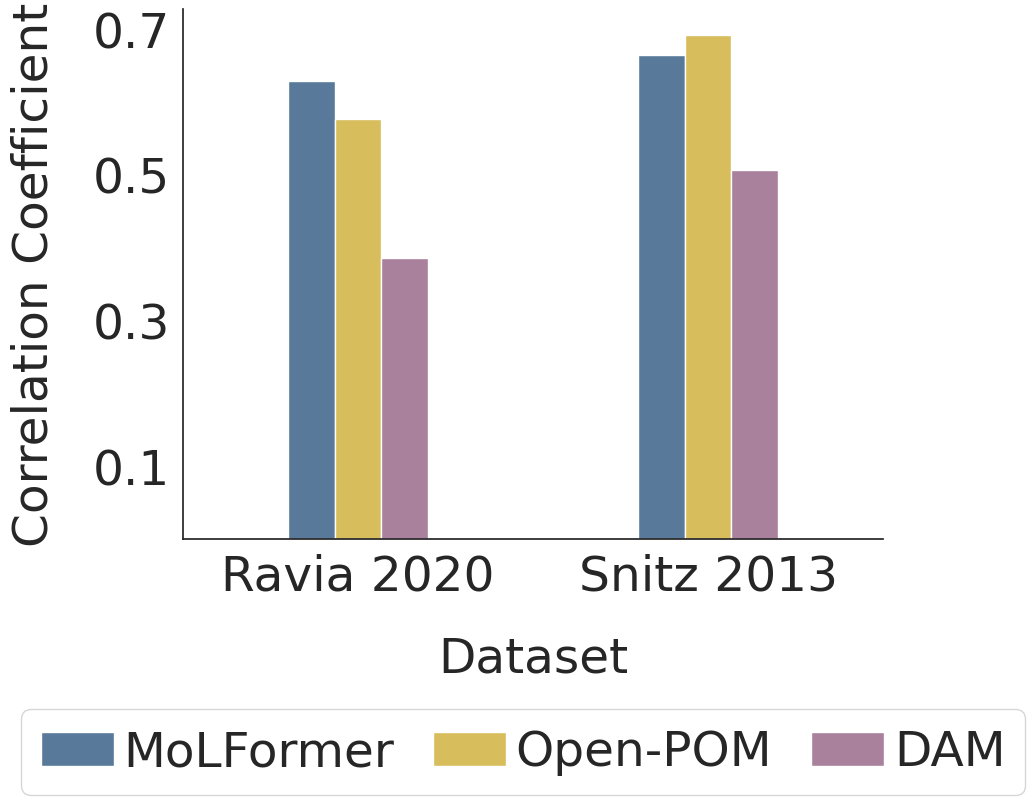

In [78]:
data={
    'row_1': ["Ravia 2020","MoLFormer" ,corr_last_ravia_similarity_average] ,'row_2':[ "Snitz 2013","MoLFormer",corr_last_snitz_average],
    'row_3':["Ravia 2020","Open-POM" ,corr_last_ravia_similarity_pom_average], 'row_4':["Snitz 2013","Open-POM" ,corr_last_snitz_pom_average],
    'row_5':["Ravia 2020","DAM" ,corr_last_ravia_similarity_dam_average], 'row_6':["Snitz 2013","DAM" ,corr_last_snitz_dam_average],
    # 'row_7':["Ravia 2020","Finetuned MoLFormer" ,corr_last_ravia_finetuned_similarity_smiles], 'row_8':["Snitz 2013","Finetuned MoLFormer" ,corr_last_snitz_finetuned_smiles],
     }
grid=False
# [0.1,0.3,0.5,0.7],['0.1','0.3','0.5','0.7']
plot_bars(data,"perception",f"figs/camera_ready/realign_correlations_{grid}.pdf",[0.1,0.3,0.5,0.7],['0.1','0.3','0.5','0.7'],3,grid=grid)

/tmp/ipykernel_1038218/1820423647.py:21: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.lineplot(data=df_corrs, x="Layer", y="Correlation", hue="Dataset", palette=palette, lw=7)


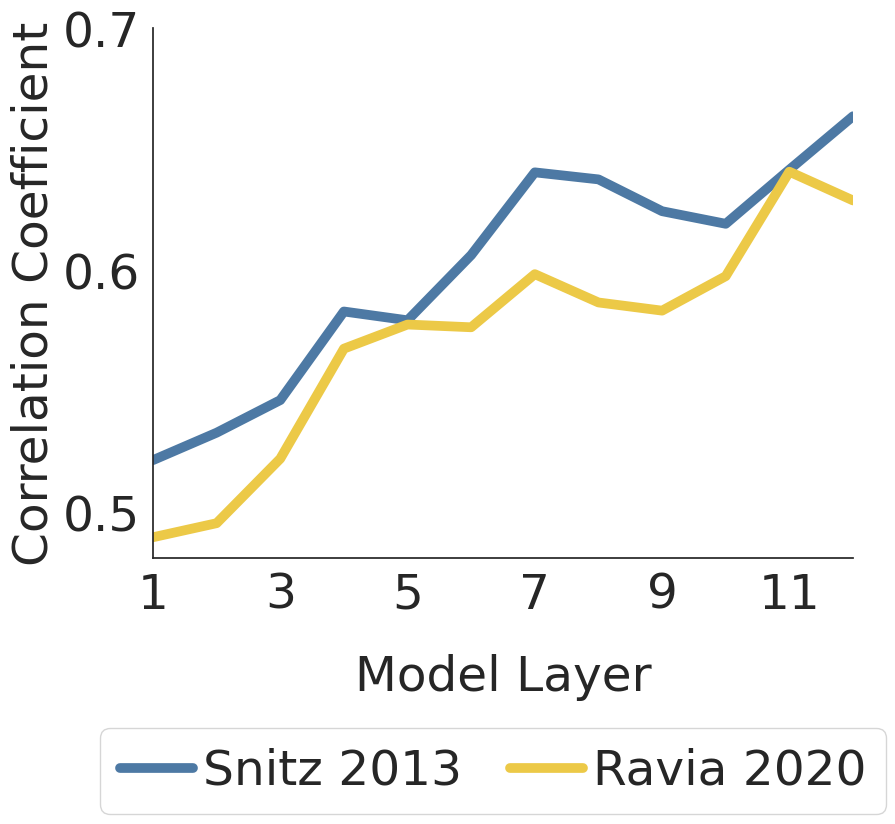

In [79]:
grid=False
data={'row_1':  [ "Snitz 2013",corr_last_snitz_average_layers ],'row_2':["Ravia 2020" ,corr_last_ravia_similarity_average_layers] }
plot_lines(data,"perception",f"figs/camera_ready/realign_layers_{grid}.pdf",y_ticks= [0.5,0.6,0.7],yticklabels=[ '0.5','0.6','0.7'],grid=grid)

/tmp/ipykernel_1038218/3282657179.py:14: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g = sns.barplot(df_corrs, x="Dataset", y="Correlation", hue="type", width=0.4, palette=palette)


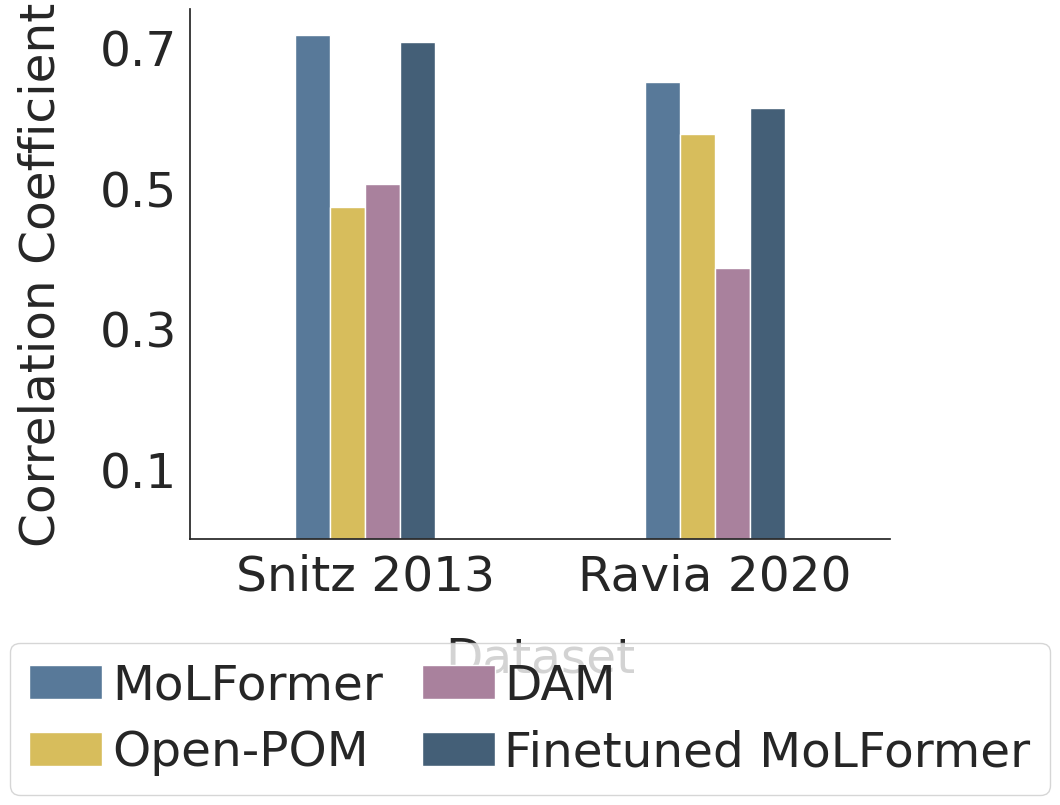

In [80]:
plt.rcParams["font.size"] = 35
data={
    'row_1':  [ "Snitz 2013","MoLFormer",corr_last_snitz_smiles],'row_2':["Ravia 2020","MoLFormer" ,corr_last_ravia_similarity_smiles],
    'row_3':["Ravia 2020","Open-POM" ,corr_last_ravia_similarity_pom_average], 'row_4':["Snitz 2013","Open-POM" ,corr_last_snitz_pom_sum],
    'row_5':["Ravia 2020","DAM" ,corr_last_ravia_similarity_dam_average], 'row_6':["Snitz 2013","DAM" ,corr_last_snitz_dam_average],
    'row_7':["Ravia 2020","Finetuned MoLFormer" ,corr_last_ravia_finetuned_similarity_average], 'row_8':["Snitz 2013","Finetuned MoLFormer" ,corr_last_snitz_finetuned_average],
     }
plot_bars(data,"perception","figs/realign_correlations_finetune.pdf",[0.1,0.3,0.5,0.7],['0.1','0.3','0.5','0.7'],2)
filename="figs/realign_correlations.pdf"

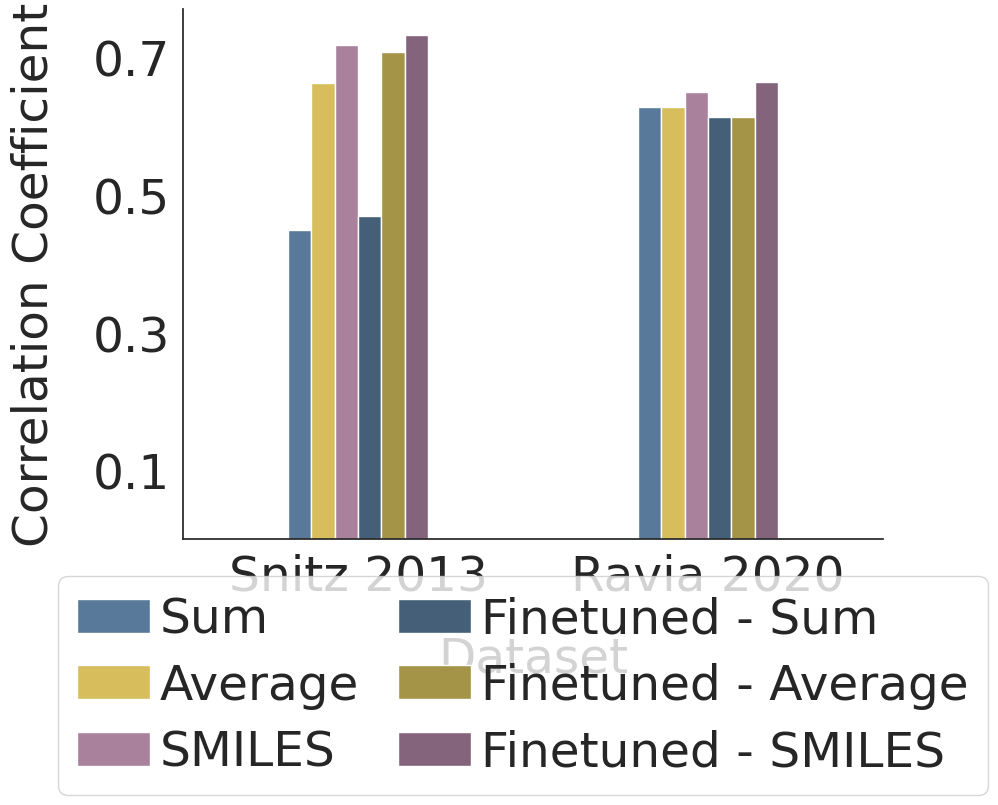

In [81]:
# plt.rcParams["font.size"] = 35
# data={
#     'row_1':  [ "Snitz 2013","Sum",corr_last_snitz_sum],'row_2':["Ravia 2020","Sum" ,corr_last_ravia_similarity_average],
#     'row_3':["Ravia 2020","Average" ,corr_last_ravia_similarity_average], 'row_4':["Snitz 2013","Average" ,corr_last_snitz_average],
#     'row_5':["Ravia 2020","SMILES" ,corr_last_ravia_similarity_smiles], 'row_6':["Snitz 2013","SMILES" ,corr_last_snitz_smiles],
#     
#     'row_7':  [ "Snitz 2013","Finetuned - Sum",corr_last_snitz_finetuned_sum],'row_8':["Ravia 2020","Finetuned - Sum" ,corr_last_ravia_finetuned_similarity_average],
#     'row_9':["Ravia 2020","Finetuned - Average" ,corr_last_ravia_finetuned_similarity_average], 'row_10':["Snitz 2013","Finetuned - Average" ,corr_last_snitz_finetuned_average],
#     'row_11':["Ravia 2020","Finetuned - SMILES" ,corr_last_ravia_finetuned_similarity_smiles], 'row_12':["Snitz 2013","Finetuned - SMILES" ,corr_last_snitz_finetuned_smiles],
#      }
# plot_bars(data,"perception","figs/realign_correlations_mixture_comparison.pdf",[0.1,0.3,0.5,0.7],['0.1','0.3','0.5','0.7'],2)

In [115]:
def pom_frame(pom_embeds, y, required_desc, title, size1, size2, size3,reduction_method = 'PCA',perplexity=None):
    plt.rcParams['legend.title_fontsize'] = 30
    sns.set_style("ticks")
    sns.despine()
    # sns.set_style("white")

    # pom_embeds = model.predict_embedding(dataset)
    # y_preds = model.predict(dataset)
    # required_desc = list(dataset.tasks)
    type1 = {'floral': '#F3F1F7', 'subs': {'muguet': '#FAD7E6', 'lavender': '#8883BE', 'jasmin': '#BD81B7'}}
    type2 = {'meaty': '#F5EBE8', 'subs': {'savory': '#FBB360', 'beefy': '#7B382A', 'roasted': '#F7A69E'}}
    type3 = {'ethereal': '#F2F6EC', 'subs': {'cognac': '#BCE2D2', 'fermented': '#79944F', 'alcoholic': '#C2DA8F'}}

    # Assuming you have your features in the 'features' array
    if reduction_method == 'PCA':
        pca = PCA(n_components=2,
              iterated_power=10)  # You can choose the number of components you want (e.g., 2 for 2D visualization)
        reduced_features = pca.fit_transform(pom_embeds)  # try different variations
        variance_explained = pca.explained_variance_ratio_
        variance_pc1 = variance_explained[0]
        variance_pc2 = variance_explained[1]
        print(variance_pc1,variance_pc2)

    elif reduction_method == 'tsne':
        tsne = manifold.TSNE(
            n_components=2,
            init="random",
            random_state=0,
            perplexity=perplexity,

        )
        reduced_features = tsne.fit_transform(pom_embeds)
    elif reduction_method == 'UMAP':
        reduced_features = umap.UMAP(n_components=2, n_neighbors=perplexity, min_dist=0.0, metric='euclidean').fit_transform(X=pom_embeds)

    else:
        raise ValueError('Invalid reduction method')

    # if is_preds:
    #     y = np.where(y_preds>threshold, 1.0, 0.0) # try quartile range (or rank)
    # else:
    #     y = dataset.y

    # Generate grid points to evaluate the KDE on (try kernel convolution)
    x_grid, y_grid = np.meshgrid(np.linspace(reduced_features[:, 0].min(), reduced_features[:, 0].max(), 500),
                                 np.linspace(reduced_features[:, 1].min(), reduced_features[:, 1].max(), 500))
    grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()])
    print(reduced_features[:, 0].min(), reduced_features[:, 0].max(),reduced_features[:, 1].min(), reduced_features[:, 1].max())

    def get_kde_values(label):
        plot_idx = required_desc.index(label)
        # print(y[:, plot_idx])
        label_indices = np.where(y[:, plot_idx] == 1)[0]
        kde_label = gaussian_kde(reduced_features[label_indices].T)
        kde_values_label = kde_label(grid_points)
        kde_values_label = kde_values_label.reshape(x_grid.shape)
        return kde_values_label

    def plot_contours(type_dictionary, bbox_to_anchor):
        main_label = list(type_dictionary.keys())[0]
        plt.contourf(x_grid, y_grid, get_kde_values(main_label), levels=1,
                     colors=['#00000000', type_dictionary[main_label], type_dictionary[main_label]])
        axes = plt.gca()  # Getting the current axis

        axes.spines['top'].set_visible(False)
        axes.spines['right'].set_visible(False)
        
        for axis in ['bottom','left']:
            axes.spines[axis].set_linewidth(2)
        legend_elements = []
        for label, color in type_dictionary['subs'].items():
            plt.contour(x_grid, y_grid, get_kde_values(label), levels=1, colors=color, linewidths=2)
            legend_elements.append(Patch(facecolor=color, label=label))
        legend = plt.legend(handles=legend_elements, title=main_label, bbox_to_anchor=bbox_to_anchor, prop={'size': 35})
        
        legend.get_frame().set_facecolor(type_dictionary[main_label])
        plt.gca().add_artist(legend)

    fig = plt.figure(figsize=(15, 15), dpi=700)
    # ax.spines[['right', 'top']].set_visible(False)
    # plt.title('KDE Density Estimation with Contours in Reduced Space')
    # plt.xlabel(f'Principal Component 1 ({round(variance_pc1*100, ndigits=2)}%)')
    # plt.ylabel(f'Principal Component 2 ({round(variance_pc2*100, ndigits=2)}%)')
    plt.xlabel('Principal Component 1', fontsize=45)
    plt.ylabel('Principal Component 2', fontsize=45)
    plot_contours(type_dictionary=type1, bbox_to_anchor=size1)
    plot_contours(type_dictionary=type2, bbox_to_anchor=size2)
    plot_contours(type_dictionary=type3, bbox_to_anchor=size3)
    # plt.legend(title='Perception', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yticks([])
    
    plt.xticks([])
    
    # plt.yticks(fontsize=35)
    # plt.xticks(fontsize=35)
    # plt.colorbar(label='Density')
    # plt.show()
    # png_file = os.path.join(dir, 'pom_frame.png')
    # plt.savefig(png_file)
    plt.savefig("figs/camera_ready/realign_islands_" + title+"_" + reduction_method+"_" +str(perplexity) +".svg")
    plt.savefig("figs/camera_ready/realign_islands_" + title+"_" + reduction_method+"_" +str(perplexity) +".pdf")
    plt.savefig("figs/camera_ready/realign_islands_" + title+"_" + reduction_method+"_" +str(perplexity) +".jpg")



In [83]:
df_gslf_mols, _,_,_,df_gslf_mols_embeddings_zscored,_,_=prepare_goodscentleffignwell_mols(modeldeepchem_gslf,lm,tokenizer)
input_embeddings='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/pom/gslf_pom_embeddings_Apr17.csv'
df_gslf_pom = pd.read_csv(input_embeddings, converters={'embeddings': pd.eval , "y": pd.eval})


In [87]:
input_embeddings='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/alva/gslf_molecules_alva_17Apr.csv'
df_gslf_dam = pd.read_csv(input_embeddings, converters={'embeddings': pd.eval , "y": pd.eval})

In [116]:

# type1 = {'floral': '#F3F1F7', 'subs': {'muguet': '#FAD7E6', 'lavender': '#8883BE', 'jasmin': '#BD81B7'}}
size1 = (0.34, 0.28)

# type2 = {'meaty': '#F5EBE8', 'subs': {'savory': '#FBB360', 'beefy': '#7B382A', 'roasted': '#F7A69E'}}
size2 = (0.7, 1.02)

# type3 = {'ethereal': '#F2F6EC', 'subs': {'cognac': '#BCE2D2', 'fermented': '#79944F', 'alcoholic': '#C2DA8F'}}
size3 = (1, 0.35)
plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_mols_embeddings_zscored['Combined'].values.tolist()),np.asarray(df_gslf_mols.y.values.tolist()), gs_lf_tasks,"molformer",size1,size2,size3)
# pom_frame(np.asarray(df_gslf_pom['embeddings'].values.tolist()),np.asarray(df_gslf_pom.y.values.tolist()), "/kaggle/working/", TASKS,"1",size1,size2,size3)

0.10830947564574502 0.08172661804989245
-19.81762403510413 24.251714676808604 -21.534291465460246 23.4665639731915


<Figure size 1000x1000 with 0 Axes>

In [117]:

size1 = (0.8, 0.4)
size2 = (0.9, 1.02)
size3 = (0.4, 1.02)
plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_pom['embeddings'].values.tolist()),np.asarray(df_gslf_pom.y.values.tolist()), gs_lf_tasks,"pom",size1,size2,size3)

0.1150534913669208 0.07378931789259334
-6.848732471781236 11.21113972611293 -6.46518627724572 6.605676672934224


<Figure size 1000x1000 with 0 Axes>

In [185]:

size1 = (0.8, 0.4)
size2 = (0.9, 1.01)
size3 = (0.4, 1.02)
plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_dam['embeddings'].values.tolist()),np.asarray(df_gslf_pom.y.values.tolist()), gs_lf_tasks,"dam",size1,size2,size3)

KeyError: 'embeddings'

In [ ]:
size1 = (0.3, 0.28)
size2 = (0.6, 1)
size3 = (1, 0.35)
plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_mols_embeddings_zscored['Combined'].values.tolist()),np.asarray(df_gslf_mols.y.values.tolist()), gs_lf_tasks,"molformer",size1,size2,size3,reduction_method='tsne',perplexity=50)

In [ ]:
size1 = (0.8, 0.4)
size2 = (0.9, 1.01)
size3 = (0.4, 1.02)
plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_pom['embeddings'].values.tolist()),np.asarray(df_gslf_pom.y.values.tolist()), gs_lf_tasks,"pom",size1,size2,size3,reduction_method='tsne',perplexity=10)


In [ ]:
size1 = (0.3, 0.28)
size2 = (0.6, 1)
size3 = (1, 0.35)
plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_mols_embeddings_zscored['Combined'].values.tolist()),np.asarray(df_gslf_mols.y.values.tolist()), gs_lf_tasks,"molformer",size1,size2,size3,reduction_method='UMAP',perplexity=30)

In [ ]:
size1 = (0.8, 0.4)
size2 = (0.9, 1.01)
size3 = (0.4, 1.02)

plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_pom['embeddings'].values.tolist()),np.asarray(df_gslf_pom.y.values.tolist()), gs_lf_tasks,"pom",size1,size2,size3,reduction_method='UMAP',perplexity=20)


In [172]:
def vis_heat_map(df,df2=None,title="",vmin=None,vmax=None):
    df_symmetric = df.combine_first(df.T)
#show half heatmap
    sns.set_style(style='white')
    if df2 is not None:
        df_2_symmetric = df2.combine_first(df2.T)

        df_symmetric = df_symmetric.where(df_2_symmetric.notna(), other=np.nan)
    ax =sns.heatmap(df_symmetric,vmin=vmin,vmax=vmax,cmap='rocket_r',xticklabels=np.arange(0, len(df.columns), 1),yticklabels=np.arange(0, len(df.columns), 1))
    
    #set xticks as 0 TO LENGTH OF CELLS
    # ax.set_xticks(np.arange(0, len(df.columns), 1))
    # ax.set_yticks(np.arange(0, len(df.columns), 1))
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax.set(xlabel='', ylabel='')
    ax.invert_yaxis()
    fig = ax.get_figure()
    fig.savefig("figs/rebuttal/"+title+".pdf")

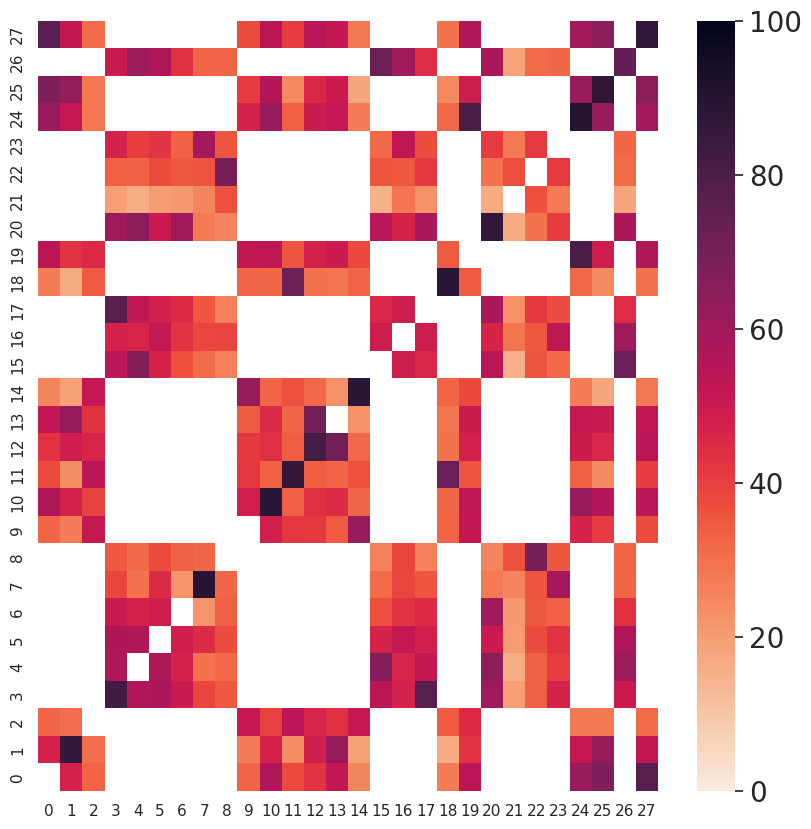

In [173]:
vis_heat_map(df_ravia_similarity_mean_pivoted,title="ravia_human",vmin=0,vmax=100)

In [ ]:
vis_heat_map(cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles,df_ravia_similarity_mean_pivoted,"ravia_molformer",vmin=-0.5,vmax=1)

In [ ]:
vis_heat_map(cosine_sim_df_ravia_similarity_mols_embeddings_pom_sum,df_ravia_similarity_mean_pivoted,"ravia_pom",vmin=0.4,vmax=1)

In [ ]:
# vis_heat_map(cosine_sim_df_snitz_mols_embeddings_pom_sum,df_snitz_mean_pivoted,"ravia_pom")

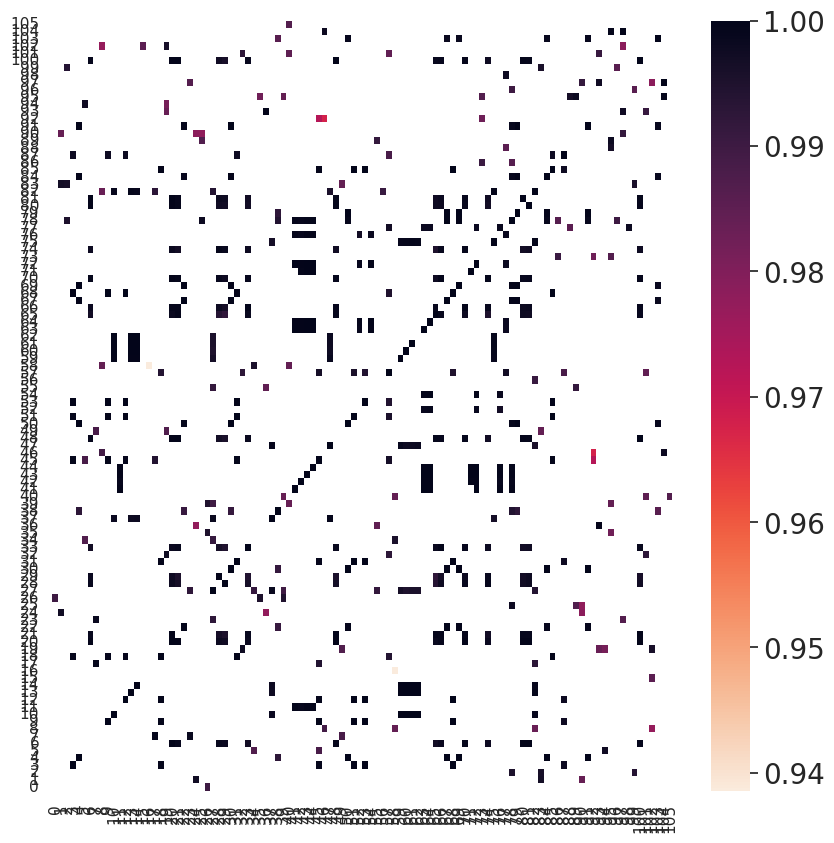

In [177]:
vis_heat_map(cosine_sim_df_ravia_similarity_mols_embeddings_DAM_average,df_snitz_mean_pivoted,"ravia_dam")